In [1]:
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16,ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist,fashion_mnist,cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

170500096/170498071 [==============================] - 6s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


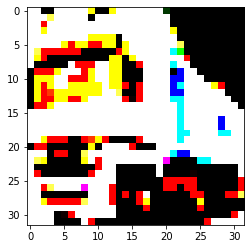

In [3]:
plt.imshow(x_train[1])

In [0]:
def resize_data(data):
  data_upscaled = []
  for i, img in enumerate(data):
    large_img = cv2.resize(img, dsize=(100, 100))
    data_upscaled.append(large_img)
  return data_upscaled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


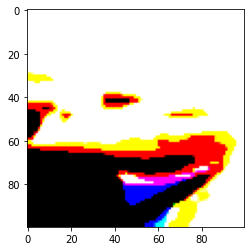

In [5]:
x_train = np.array(resize_data(x_train))
x_test = np.array(resize_data(x_test)) 
plt.imshow(x_test[1])

In [6]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 100, 100, 3) (10000, 100, 100, 3) (50000, 10) (10000, 10)


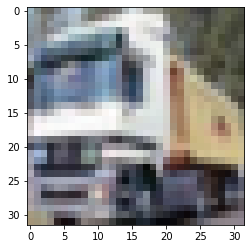

In [0]:
x_train = x_train/255
x_test = x_test/255
x_test.mean()
plt.imshow(x_train[1])

In [7]:
base = ResNet50(include_top = False,weights='imagenet',input_shape = (100,100,3))
model = models.Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 40,370,570
Trainable params: 16,782,858
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
model.fit(x_train,y_train,epochs=10,batch_size=500,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 142s 3ms/step - loss: 2.5096 - accuracy: 0.6696 - val_loss: 1.0696 - val_accuracy: 0.7368
Epoch 2/10
50000/50000 [==============================] - 133s 3ms/step - loss: 0.7404 - accuracy: 0.7814 - val_loss: 1.0850 - val_accuracy: 0.7620
Epoch 3/10
50000/50000 [==============================] - 133s 3ms/step - loss: 0.5445 - accuracy: 0.8324 - val_loss: 1.1235 - val_accuracy: 0.7703
Epoch 4/10
50000/50000 [==============================] - 133s 3ms/step - loss: 0.4118 - accuracy: 0.8720 - val_loss: 1.1568 - val_accuracy: 0.7796
Epoch 5/10
50000/50000 [==============================] - 133s 3ms/step - loss: 0.3458 - accuracy: 0.8932 - val_loss: 1.2935 - val_accuracy: 0.7863
Epoch 6/10
50000/50000 [==============================] - 133s 3ms/step - loss: 0.2697 - accuracy: 0.9151 - val_loss: 1.1505 - val_accuracy: 0.8051
Epoch 7/10
50000/50000 [==============================] - 133s